In [17]:
# ============================================
# 01_Preprocessing.ipynb
# Step 1: Import required libraries
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [18]:
# ============================================
# Step 2: Load dataset
# ============================================

df = pd.read_csv(r"C:\Users\rudra\Desktop\Ml\AlzheimerSpeechDetection\data\addetector_dataset.csv")

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()


✅ Dataset loaded successfully!
Shape: (1010, 66)


,duration_sec,chunk_count,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,linguistic_feat_42,linguistic_feat_43,linguistic_feat_44,linguistic_feat_45,linguistic_feat_46,linguistic_feat_47,linguistic_feat_48,linguistic_feat_49,linguistic_feat_50,label
0,10.043262,35.0,0.170832,1.260207,0.293262,-1.183015,-0.521902,0.564814,0.710332,0.855109,...,-0.071778,-0.404672,0.450733,0.824878,-0.175036,0.883084,0.033538,0.045031,0.200439,1
1,22.114289,19.0,0.454972,0.455061,0.760773,1.664440,1.561906,-0.594606,-2.097895,-0.678529,...,-0.328909,-0.067018,0.790259,-0.230832,-0.192624,0.216806,0.505999,0.469242,-0.960403,1
2,7.196703,13.0,0.217214,-0.346633,-1.924812,-0.078618,3.254647,-1.244458,-1.814873,1.936389,...,0.196236,0.508710,0.427617,0.747379,0.898656,-0.935108,0.950602,0.741085,-0.234105,1
3,8.470619,27.0,0.955154,2.110354,-1.168544,1.280734,0.381839,0.163061,-0.007729,-1.384647,...,-0.346869,-0.427321,0.763919,-0.676585,-0.637875,0.143438,-0.312683,-0.156941,0.613093,0
4,5.067772,23.0,0.079000,1.079544,1.425937,1.308224,-0.528279,1.014105,0.211641,1.725908,...,-0.010732,-0.872953,-0.448815,0.353535,0.472526,-0.514356,0.007640,0.635062,-0.240180,0


In [31]:
# ============================================
# Step 3: Check and clean missing values
# ============================================

# Drop fully empty columns (if any)
df = df.dropna(axis=1, how='all')

# Fill numeric NaNs with mean
df = df.fillna(df.mean(numeric_only=True))

# Remove duplicates
df = df.drop_duplicates()

print("✅ Data cleaned. Shape:", df.shape)



✅ Data cleaned. Shape: (1010, 69)


In [32]:
# ============================================
# Step 4: Define feature groups
# ============================================

linguistic_features = [f"linguistic_feat_{i}" for i in range(1, 51)]
mfcc_features = [f"mfcc_{i}" for i in range(1, 14)]
basic_features = ["duration_sec", "chunk_count"]
target_col = "label"

print(f"Linguistic features: {len(linguistic_features)} | MFCC features: {len(mfcc_features)}")


Linguistic features: 50 | MFCC features: 13


In [33]:
# ============================================
# Step 5: Reduce linguistic features and summarize MFCCs
# ============================================

# --- Linguistic: PCA reduction to top 10 components ---
pca = PCA(n_components=10, random_state=42)
linguistic_pca = pca.fit_transform(df[linguistic_features])

linguistic_pca_df = pd.DataFrame(
    linguistic_pca,
    columns=[f"ling_pca_{i+1}" for i in range(10)]
)
print("✅ Linguistic features reduced via PCA to 10 components.")

# --- MFCC: mean, std, variance ---
df["mfcc_mean"] = df[mfcc_features].mean(axis=1)
df["mfcc_std"]  = df[mfcc_features].std(axis=1)
df["mfcc_var"]  = df[mfcc_features].var(axis=1)

print("✅ MFCC features summarized with mean, std, and variance.")


✅ Linguistic features reduced via PCA to 10 components.
✅ MFCC features summarized with mean, std, and variance.


In [34]:
# ============================================
# Step 6: Combine final features
# ============================================

final_df = pd.concat([
    df[basic_features].reset_index(drop=True),
    linguistic_pca_df.reset_index(drop=True),
    df[["mfcc_mean", "mfcc_std", "mfcc_var"]].reset_index(drop=True),
    df[[target_col]].reset_index(drop=True)
], axis=1)

print("✅ Combined feature dataset created.")
print("Shape:", final_df.shape)
final_df.head()


✅ Combined feature dataset created.
Shape: (1010, 16)


,duration_sec,chunk_count,ling_pca_1,ling_pca_2,ling_pca_3,ling_pca_4,ling_pca_5,ling_pca_6,ling_pca_7,ling_pca_8,ling_pca_9,ling_pca_10,mfcc_mean,mfcc_std,mfcc_var,label
0,10.043262,35.0,-0.952516,-1.424400,-0.190201,-0.298203,-1.553494,-1.095252,0.205203,0.350731,0.262766,-0.443929,0.035114,0.915020,0.837262,1
1,22.114289,19.0,0.822577,-0.138864,0.863166,-0.192125,-0.578463,0.148512,0.740631,0.198586,0.291210,-0.348814,0.298503,1.106661,1.224698,1
2,7.196703,13.0,0.653284,-0.860257,-0.198024,-0.361363,0.303798,-0.524088,-0.322330,0.463992,-1.631478,-0.163228,0.104072,1.473879,2.172320,1
3,8.470619,27.0,0.535039,-0.208846,0.399622,-0.477087,0.050355,-1.158890,1.066694,0.155561,-0.152591,-0.361008,0.238919,1.073596,1.152609,0
4,5.067772,23.0,-1.017706,0.560092,-0.246417,0.316704,0.647413,-0.760247,0.837491,0.517350,0.674709,-0.287073,0.452161,0.783283,0.613532,0


In [35]:
# ============================================
# Step 7: Feature scaling and train-test split
# ============================================

X = final_df.drop(target_col, axis=1)
y = final_df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (808, 15), Test set: (202, 15)


In [36]:
# ============================================
# Step 8: Save cleaned dataset
# ============================================

cleaned_df = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
cleaned_df.to_csv(r"C:\Users\rudra\Desktop\Ml\AlzheimerSpeechDetection\data\cleaned_data.csv", index=False)

print("✅ Cleaned dataset saved to data/cleaned_addetector_dataset.csv")



✅ Cleaned dataset saved to data/cleaned_addetector_dataset.csv


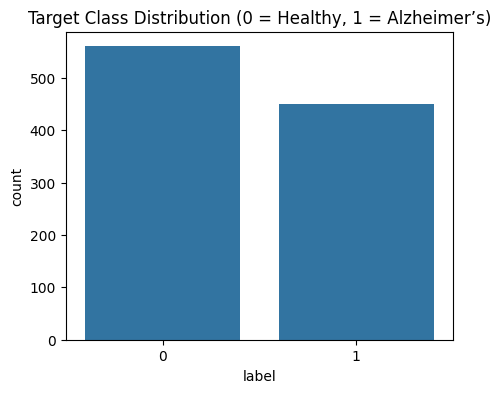

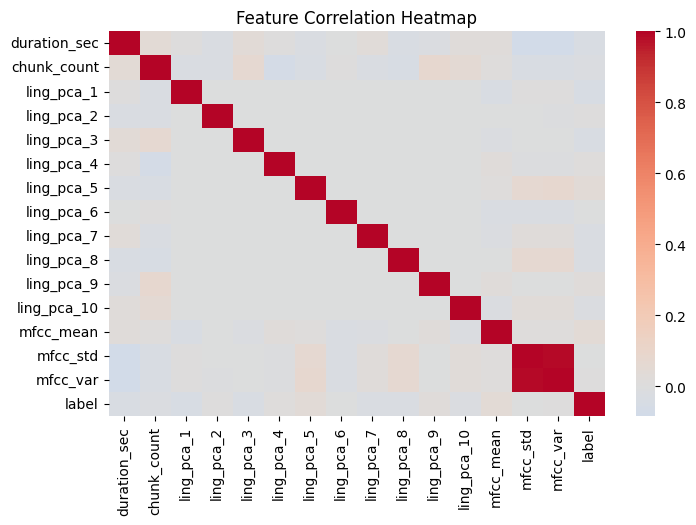

In [37]:
# ============================================
# Step 9: Visualize class distribution
# ============================================

plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Target Class Distribution (0 = Healthy, 1 = Alzheimer’s)")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(cleaned_df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()
